In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import  *

In [0]:
path = untar_data("https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet")

In [5]:
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [0]:
path_anno = path/'annotations'
path_img = path/'images'

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/yorkshire_terrier_177.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bombay_208.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_61.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_bulldog_2.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_53.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [10]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category yorkshire_terrier, Category Bombay, Category pug, Category american_pit_bull_terrier, Category pomeranian]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 500, 375), Image (3, 225, 300), Image (3, 350, 500), Image (3, 375, 500), Image (3, 300, 198)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category Bombay, Category Abyssinian, Category Egyptian_Mau, Category miniature_pinscher, Category Sphynx]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 209, 300), Image (3, 600, 800), Image (3, 300, 330), Image (3, 225, 300), Image (3, 500, 375)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

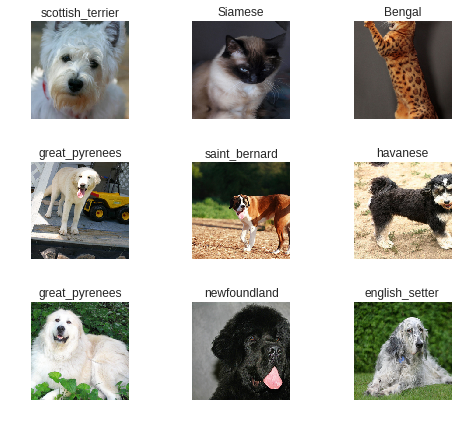

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [13]:
print("No of Classes: ",data.c)

No of Classes:  37


# **resnet34**

In [14]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 63730792.36it/s]


In [0]:
learn.model

In [15]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate
1,1.578188,0.365656,0.097429
2,0.589408,0.261446,0.089986
3,0.364486,0.217092,0.070365
4,0.291761,0.194432,0.064276
5,0.226613,0.186175,0.063599


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

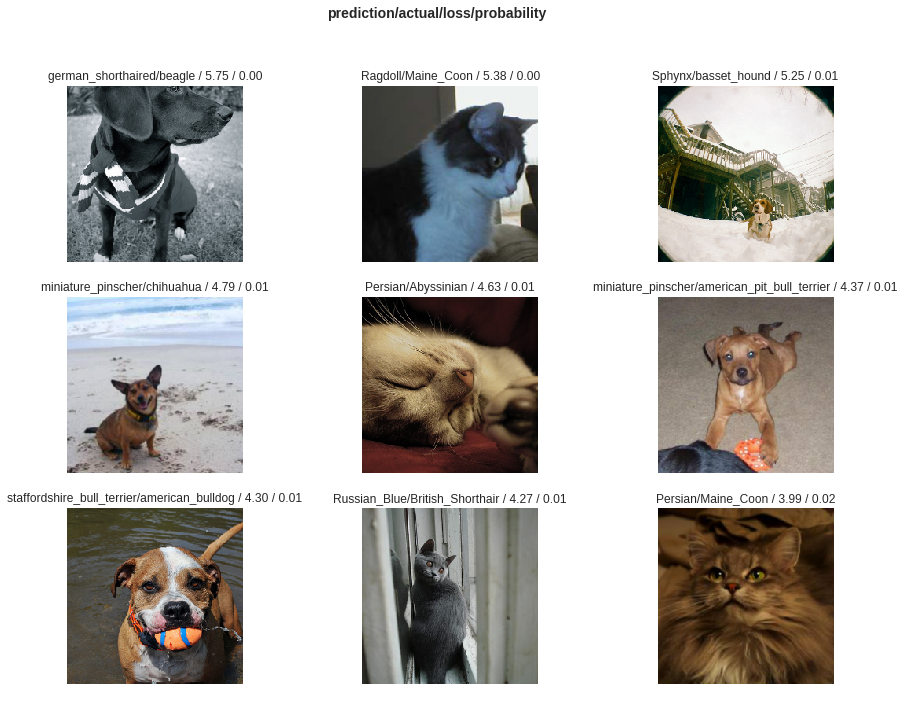

In [21]:
interp.plot_top_losses(9, figsize=(15,11))

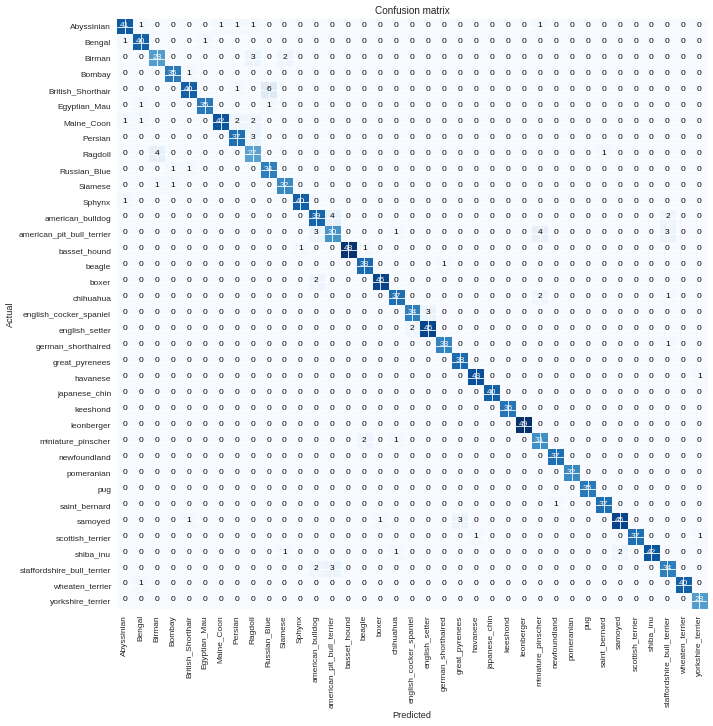

In [22]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [24]:
interp.most_confused(min_val=2)

[('British_Shorthair', 'Russian_Blue', 6),
 ('Ragdoll', 'Birman', 4),
 ('american_bulldog', 'american_pit_bull_terrier', 4),
 ('american_pit_bull_terrier', 'miniature_pinscher', 4),
 ('Birman', 'Ragdoll', 3),
 ('Persian', 'Ragdoll', 3),
 ('american_pit_bull_terrier', 'american_bulldog', 3),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 3),
 ('english_cocker_spaniel', 'english_setter', 3),
 ('samoyed', 'great_pyrenees', 3),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 3)]

In [0]:
learn.unfreeze()

In [26]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.568454,0.372767,0.123139


In [0]:
learn.load('stage-1');

In [28]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


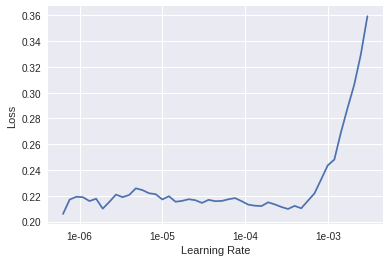

In [29]:
learn.recorder.plot()

In [34]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-3))

epoch,train_loss,valid_loss,error_rate
1,0.186768,0.186513,0.063599
2,0.194201,0.211314,0.066306
3,0.147653,0.178098,0.062923
4,0.113073,0.166494,0.057510
5,0.096773,0.160803,0.061570


***Earlier: 0.063599, After Tuning: 0.061570***


---

